### Predictive Analysis of Graduation Rates

### Data Preparation

**Table 1.** Data Fields<br>
<table ><tr><th >Field Attribute <th><th> Field Name <th><th> Data Type <tr><tr>
<tr><td> Demographic Data <td><td> Marital Status <td><td> Numeric <td><tr>
<tr><td> Demographic Data <td><td> Nationality <td><td> Numeric <td><tr>
<tr><td> Demographic Data <td><td> Displaced <td><td> Numeric <td><tr>
<tr><td> Demographic Data <td><td> Gender <td><td> Numeric <td><tr>
<tr><td> Demographic Data <td><td> Age at Enrollment <td><td> Numeric <td><tr>
<tr><td> Demographic Data <td><td> International <td><td> Numeric <td><tr>
<tr><td> Socieconomic Data <td><td> Mother's Qualification <td><td> Numeric <td><tr>
<tr><td> Socieconomic Data <td><td> Father's Qualification <td><td> Numeric <td><tr>
<tr><td> Socieconomic Data <td><td> Mother's Occupation <td><td> Numeric <td><tr>
<tr><td> Socieconomic Data <td><td> Father's Occupation <td><td> Numeric <td><tr>
<tr><td> Socieconomic Data <td><td> Educational Special Needs <td><td> Numeric <td><tr>
<tr><td> Socieconomic Data <td><td> Debtor <td><td> Numeric <td><tr>
<tr><td> Socieconomic Data <td><td> Tuition Fees Up to Date <td><td> Numeric <td><tr>
<tr><td> Socieconomic Data <td><td> Scholarship Holder <td><td> Numeric <td><tr>
<tr><td> Macroeconomic Data <td><td> Unemployment Rate <td><td> Numeric <td><tr>
<tr><td> Macroeconomic Data <td><td> Inflation Rate <td><td> Numeric <td><tr>
<tr><td> Macroeconomic Data <td><td> GDP <td><td> Numeric <td><tr>
<tr><td> Enrollment Data <td><td> Application Mode <td><td> Numeric <td><tr>
<tr><td> Enrollment Data <td><td> Application Order <td><td> Numeric <td><tr>
<tr><td> Enrollment Data <td><td> Course <td><td> Numeric <td><tr>
<tr><td> Enrollment Data <td><td> Daytime/Evening Attendance <td><td> Numeric <td><tr>
<tr><td> Enrollment Data <td><td> Previous Qualification <td><td> Numeric <td><tr>
<tr><td> Enrollment Data (End of 1st Semester) <td><td> Curricular Units 1st Sem (Credited) <td><td> Numeric <td><tr>
<tr><td> Enrollment Data (End of 1st Semester) <td><td> Curricular Units 1st Sem (Enrolled) <td><td> Numeric <td><tr>
<tr><td> Enrollment Data (End of 1st Semester) <td><td> Curricular Units 1st Sem (Evaluations) <td><td> Numeric <td><tr>
<tr><td> Enrollment Data (End of 1st Semester) <td><td> Curricular Units 1st Sem (Approved) <td><td> Numeric <td><tr>
<tr><td> Enrollment Data (End of 1st Semester) <td><td> Curricular Units 1st Sem (Grade) <td><td> Numeric <td><tr>
<tr><td> Enrollment Data (End of 1st Semester) <td><td> Curricular Units 1st Sem (Without Evaluations) <td><td> Numeric <td><tr>
<tr><td> Enrollment Data (End of 2nd Semester) <td><td> Curricular Units 1st Sem (Credited) <td><td> Numeric <td><tr>
<tr><td> Enrollment Data (End of 2nd Semester) <td><td> Curricular Units 1st Sem (Enrolled) <td><td> Numeric <td><tr>
<tr><td> Enrollment Data (End of 2nd Semester) <td><td> Curricular Units 1st Sem (Evaluations) <td><td> Numeric <td><tr>
<tr><td> Enrollment Data (End of 2nd Semester) <td><td> Curricular Units 1st Sem (Approved) <td><td> Numeric <td><tr>
<tr><td> Enrollment Data (End of 2nd Semester) <td><td> Curricular Units 1st Sem (Grade) <td><td> Numeric <td><tr>
<tr><td> Enrollment Data (End of 2nd Semester) <td><td> Curricular Units 1st Sem (Without Evaluations) <td><td> Numeric <td><tr>

Data preparation was primarily handled in previous milestones. Full steps include:<ol>
    <li>Validated dataset for any NaN/Null values (no adjustments needed)</li>
    <li> Desciprtive analysis was performed in order to better understand the basic statistics of the attributes (distribution, mean, median, min, and max)</li>
    <li> One of the issues identified early on was the possible imbalance of data within the "Target" Field, which described whether or not the student was a "Graduate", "Dropout", or "Enrolled." The dataset had a higher density of graduates (2,209) with dropouts next (1,421), and lastly enrolled (794). Graduates represented nearly 50% of the population, which could cause the model to skew towards a positive result. No adjustments were made in the preparation steps but kept in mind for model building.</li>
    <li>Early visualizations were created to look at field correlation and multi-collinearity. A heatmap using Pearson correlation coefficient was created to look at the different field attributes. Collinearity was determined to be the strongest within the same field attribute, but it could also be seen between groups. This also helped inform feature selection.</li>
    <li> To combat the earlier mentioned imbalance, the "Target" column was converted to a binary column where "Graduate" and "Enrolled" represented a value of 1 and "Dropout" represented a value of 0. This helped balance the representation imbalance and simplified the nuance of academic success between "Graduate" and "Enrolled."</li></ol>

In [29]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## library versions
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('seaborn version:', sns.__version__)

pandas version: 1.4.2
numpy version: 1.21.5
seaborn version: 0.11.2


In [3]:
## ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [8]:
## print options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

## load dataset and view preview
df = pd.read_csv("DSC630_Project.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [10]:
## (1) check for null values
null = df.isnull().values.any()
print(null)

False


In [11]:
## (2) descriptive analysis
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


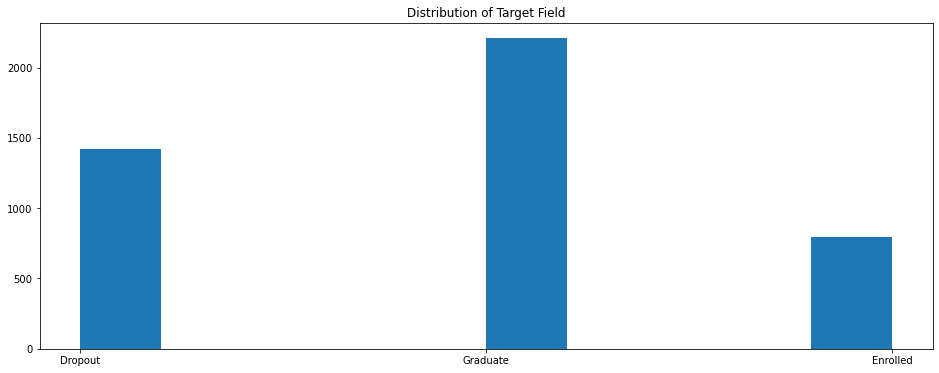

In [16]:
## (3) Distribution of "Target" field
fig = plt.figure(figsize =(16, 6))
plt.hist(df['Target'])
plt.title('Distribution of Target Field', loc = 'center', fontsize = 12)
plt.show()

In [17]:
## (4) Heatmap of Pearson Correlation

## correlation matrix
df.corr()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Curricular units 2nd sem (grade),-0.071506,-0.115424,0.055517,0.348728,0.050493,0.000942,0.053239,-0.008497,-0.031175,-0.008083,-0.020724,-0.016424,0.074402,0.069087,-0.012761,-0.139424,0.296480,-0.199133,0.181227,-0.173419,0.001460,0.132971,0.361959,0.355036,0.685560,0.837170,-0.061482,0.129770,0.395135,0.453394,0.760804,1.000000,-0.079216,0.001462,-0.038166,0.071269
Curricular units 2nd sem (without evaluations),0.020426,0.047983,-0.015757,0.030816,-0.004229,0.005102,-0.019015,-0.014041,0.021305,-0.007430,0.013091,-0.007664,-0.013254,-0.035959,-0.007491,0.048552,-0.071817,0.057223,-0.048723,0.061654,-0.010660,0.055256,0.069547,0.134296,-0.053983,-0.066076,0.583261,0.070148,0.067697,0.144877,-0.061567,-0.079216,1.000000,-0.013960,-0.034391,-0.080292
Unemployment rate,-0.020338,0.089080,-0.098419,0.007153,0.061974,0.111958,0.045222,-0.000651,-0.114351,-0.077905,-0.092057,-0.101215,0.038756,-0.130327,0.046131,0.021128,0.013460,0.022195,0.055152,0.025018,-0.010015,0.009778,0.038404,0.061545,0.051286,0.014821,-0.045144,0.010580,0.064436,0.045808,0.048805,0.001462,-0.013960,1.000000,-0.028885,-0.335178
Inflation rate,0.008761,-0.016375,-0.011133,0.017710,-0.024043,-0.063736,0.01871

#### Additional Notes:
While it was earlier indicated that the highest collinearity was between fields within the same field attribute, specifics include fields such as "Nationality" and "Internaional" and "Mother's Occupation" and "Father's Occupation."

<AxesSubplot:>

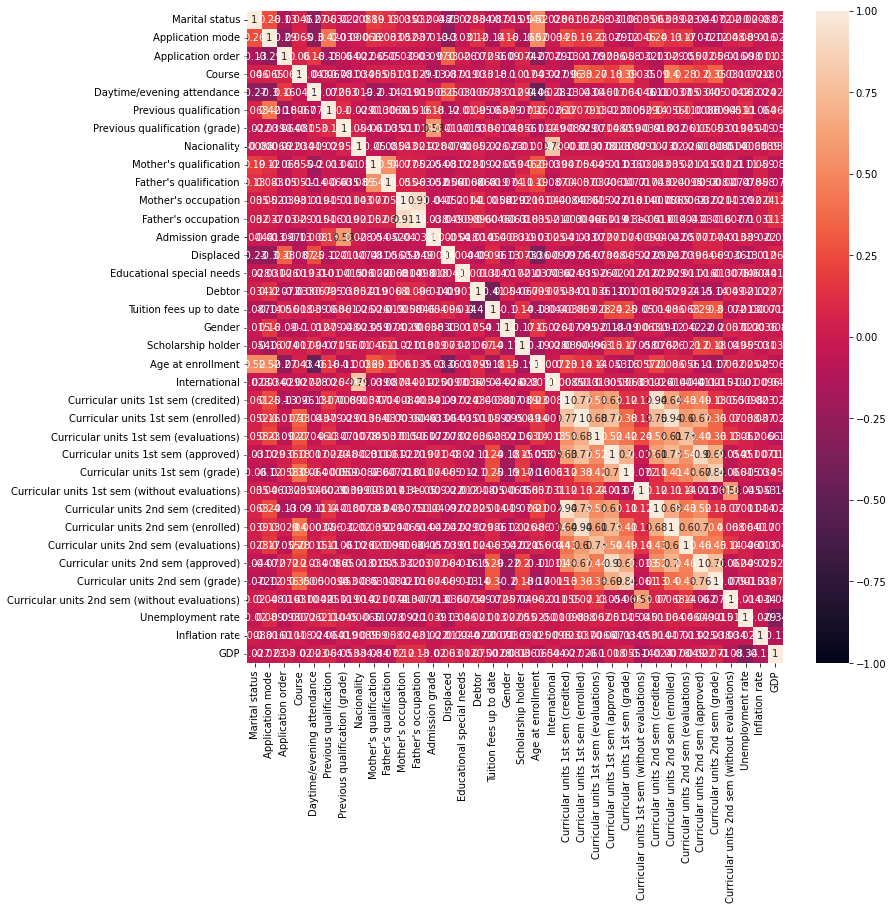

In [26]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), vmin= -1, vmax = 1, annot = True)

In [34]:
## (5) Adjust column- "Target"
df['Target'] = df['Target'].replace(['Graduate', 'Enrolled', 'Dropout'], ['1', '1', '0'])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### Build and Evaluate Models

In [41]:
## split the data

## import train_test_split
from sklearn.model_selection import train_test_split

## define X and y
X = df.drop('Target', axis=1)
y = df['Target']

## split data using 89/20 split
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state = 42, test_size = 0.2, shuffle=True)

print('X_train : ')
print(X_train.shape)

print('X_test : ')
print(X_test.shape)

print('y_train : ')
print(y_train.shape)

print('y_test : ')
print(y_test.shape)

X_train : 
(3539, 36)
X_test : 
(885, 36)
y_train : 
(3539,)
y_test : 
(885,)


### Random Forest Classifier

During initial analysis and discovery, there was a preference for moving forward with a decision tree classification model. However, during the descriptive analysis, it was difficult to conclude what fields contibuted towards a student's academic success or not. Random Forest Classifiers take the averages of decision trees, which cancels out the biases. This reduces overfitting. While it can be more challenging to interpret a random forest classifier, I felt that it would be the better model to move forward with understanding that different approaches can be made later on. 

In [43]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0) ## instantiate classifier
rfc.fit(X_train, y_train) ## fit model
y_pred = rfc.predict(X_test) ## predict Test set results

## import accuracy_score
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8554


In [46]:
## test and adjust for model accuracy, n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators = 100, random_state = 0) ## instantiate classifier
rfc_100.fit(X_train, y_train) ## fit model
y_pred_100 = rfc_100.predict(X_test) ## predict Test set results

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8554


### Results Interpretation 
There is no discernable difference between 10 decision-trees and 100-decision trees. Unexpectedlty, the accuracy neither increased nor decreased with a shift of the number of decision-trees. As all work thus far has included all attributes of the dataset, further work should be done to select only the important attributes. Once feature selection has been done, the model can be re-evaluated for accuracy.

Looking at the feature selection scores below, we can see that fields like "Marital Status", "Daytime/Evening Attendance", "Nationality", "International", and "Educational Special Needs" are the least important features in contrast to academic attributes such as "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)", and "Curricular units 1st sem (approved)."

Out of an abundance of caution, only the lowest 5 attributes will be dropped from the model. If minimal improvements to the model accuracy are found, further research and reductions will be made. 

In [47]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 0) ## n_estimators = 100
clf.fit(X_train, y_train) ## fit the model to the training set

# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_scores

Curricular units 2nd sem (approved)    0.169821
Curricular units 2nd sem (grade)       0.124344
Curricular units 1st sem (approved)    0.083448
Curricular units 1st sem (grade)       0.068416
Tuition fees up to date                0.061234
                                         ...   
Marital status                         0.003309
Daytime/evening attendance             0.002624
Nacionality                            0.002515
International                          0.001437
Educational special needs              0.000895
Length: 36, dtype: float64

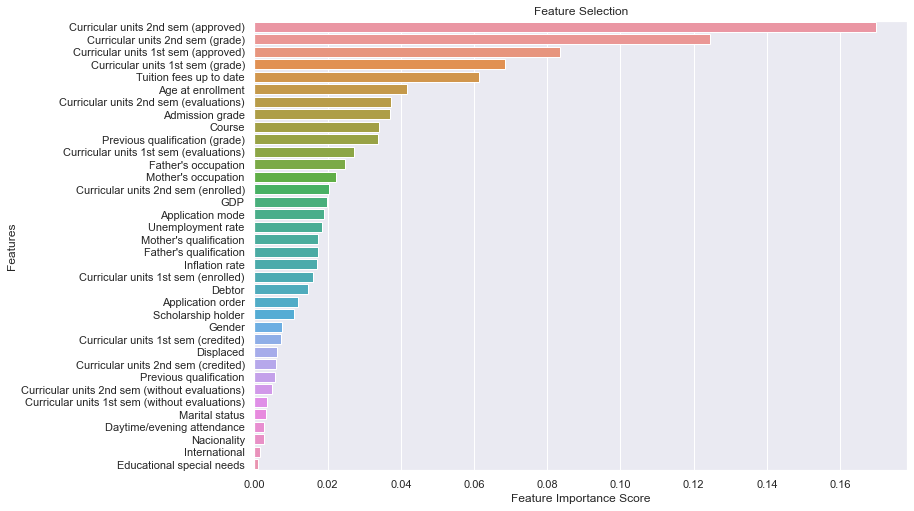

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Selection')
plt.show()

In [50]:
### Model Rebuild

## define X and y
X = df.drop(['Target', 'Marital status', 'Daytime/evening attendance', 'Nacionality', 'International', 'Educational special needs'], axis=1)
y = df['Target']

## split data using 89/20 split
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state = 42, test_size = 0.2, shuffle=True)

print('X_train : ')
print(X_train.shape)

print('X_test : ')
print(X_test.shape)

print('y_train : ')
print(y_train.shape)

print('y_test : ')
print(y_test.shape)

X_train : 
(3539, 31)
X_test : 
(885, 31)
y_train : 
(3539,)
y_test : 
(885,)


In [51]:
## model rebuild, n_estimators = 10
rfc = RandomForestClassifier(random_state = 0) ## instantiate classifier
rfc.fit(X_train, y_train) ## fit model
y_pred = rfc.predict(X_test) ## predict Test set results

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8621


In [52]:
## test and adjust for model accuracy, n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators = 100, random_state = 0) ## instantiate classifier
rfc_100.fit(X_train, y_train) ## fit model
y_pred_100 = rfc_100.predict(X_test) ## predict Test set results

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8621


### Results Interpretation (2)
The initial model accuracy score was .8554. Once 5 fields were removed, the model accuracy improved to .8621, which was a +.0067 improvement. While the model is improving in regards to accuracy, it is still challenging to fully understand the full impact of individual fields. To further summarize the performance of the random forest classifier model, a confusion matrix can assist in interpreting the overall performance and any errors that are being produced by the model.

Within the 2x2 confusion matrix below, we can interpret the four different results s such:
<ol><li> True Positive (Upper Left): 228, which indicates where the model correctly predicted the positive class </li>
    <li> False Positive (Upper Right): 88, which indicates where the model incorrectly predicted the positive class when it was actually negative (type 1 error)</li>
    <li> False Negative (Lower Left): 34, which indicates where the model incorrectly predicted the negative class when it was actually positive (type 2 error) </li>
    <li> True Negative (Lower Right): 535, which indicates where the model correctly predicted a negative class. </li><ol>

In [53]:
## Confusion Matrix

## import confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[228  88]
 [ 34 535]]


In [71]:
## import metrics libraries
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [68]:
## recall
recall_score(y_test, y_pred, average = None)

array([0.72151899, 0.94024605])

In [69]:
## precision
precision_score(y_test, y_pred, average = None)

array([0.87022901, 0.85874799])

In [70]:
f1_score(y_test, y_pred, average = None)

array([0.78892734, 0.89765101])

In order to further finetune the model, "SelectFromModel" will be used in order to automatically select the features that have a greater importance than the mean importance of all of the features.

This features selection shows that 10 fields have an importance less than the mean of all of the features. However, once these fields have been dropped from the dataset, the model's accuracy drops to .7684, which is significantly worse than the previous accuracy score. My best hypothesis is that this is due to the high correlation/multicollinearity found during the descriptive analysis. Final recommendation would be to return the first model rebuild with a model accuracy of .8621.

In [73]:
## import SelectFromModel
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [76]:
## True = importance is greater than the mean importance
## False = importance is lss than the mean importance
sel.get_support()

array([False, False,  True, False,  True, False, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False,  True,  True, False, False, False,  True,  True,  True,
       False, False, False, False])

In [78]:
## get features column names
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['Course', 'Previous qualification (grade)', 'Admission grade',
       'Tuition fees up to date', 'Age at enrollment',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')


In [81]:
### Model Rebuild 2

## define X and y
X = df.drop(['Target', 'Marital status', 'Daytime/evening attendance', 'Nacionality', 'International', 
             'Educational special needs', 'Course', 'Previous qualification (grade)', 'Admission grade',
       'Tuition fees up to date', 'Age at enrollment', 'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)','Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'], axis=1)
y = df['Target']

## split data using 89/20 split
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state = 42, test_size = 0.2, shuffle=True)

print('X_train : ')
print(X_train.shape)

print('X_test : ')
print(X_test.shape)

print('y_train : ')
print(y_train.shape)

print('y_test : ')
print(y_test.shape)

X_train : 
(3539, 21)
X_test : 
(885, 21)
y_train : 
(3539,)
y_test : 
(885,)


In [82]:
## model rebuild, n_estimators = 10
rfc = RandomForestClassifier(random_state = 0) ## instantiate classifier
rfc.fit(X_train, y_train) ## fit model
y_pred = rfc.predict(X_test) ## predict Test set results

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7684


In [83]:
## test and adjust for model accuracy, n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators = 100, random_state = 0) ## instantiate classifier
rfc_100.fit(X_train, y_train) ## fit model
y_pred_100 = rfc_100.predict(X_test) ## predict Test set results

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7684


### Decision Tree Classifier
As a comparison, the decision tree classifier model was built as a comparison to the original Random Forest Classifier. Accuracy was .8305, which was markedly lower than the Random Forest Classifier's performance at .8621.

In [87]:
### taken from original mode

## define X and y
X = df.drop(['Target'], axis=1)
y = df['Target']

## split data using 89/20 split
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state = 42, test_size = 0.2, shuffle=True)

print('X_train : ')
print(X_train.shape)

print('X_test : ')
print(X_test.shape)

print('y_train : ')
print(y_train.shape)

print('y_test : ')
print(y_test.shape)

X_train : 
(3539, 36)
X_test : 
(885, 36)
y_train : 
(3539,)
y_test : 
(885,)


In [ ]:
## import Decision Tree Classifier
import sklearn.tree import DecisionTreeClassifier

In [88]:
## create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(X, y) ## train decision tree classifier
y_pred = clf.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.8305084745762712


In [90]:
## import classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       316
           1       0.82      0.94      0.88       569

    accuracy                           0.83       885
   macro avg       0.84      0.79      0.80       885
weighted avg       0.83      0.83      0.82       885



### Conclusions and Ethical Implications
Based on the models explored in this milestone, there is a higher desire to move forward with the random forest classification model. However, there is still interest in exploring an artificial neural network. Within the time constraints of this milestone, the artificial neural network was not explored, as the ultimate goal of this project is to be able to present the findings of this analysis and model building as if presenting to executives. From personal experience, it is better to ground the any work in tangible attributes and relationships, which I am concerned about doing successfully with an artificial neural network, especially considering the size of the dataset. <br>

Both the random forest classifier and decision tree models performed in the mid-80s regarding model accuracy. I anticipated that the random forest classifier would perform the best, as this model is an amalgamation of decision tree classifiers. Improving the model accuracy is the main concern in the final stretch of the project with the ultimate goal to be at or above 90% accuracy. More work needs to be done to finetune field relevancy, as dropping too many fields (as seen in the 2nd model rebuild) resulted in a significant drop in model accuracy. However, dropping 5 of the lowest relevant fields only resulted in a minimal accuracy improvement. <br>


Despite the goal being for the model to perform at or above 90% accuracy, it is important to understand that the data is incredibly nuanced and categorical in nature. Compared to real-world data, the size of the dataset is relatively small when considering the scale of a real-world university's population. Fields with high relevance are also ethically challenging to source, as the fields include demographic and socioeconomic data. While PII data was removed from the dataset, PII would need to be available in order to expand and collect the necessary data for any future work. <br>

The majority of this data is sensitive in nature. Ethical data collection and analysis is important to prevent biasing the data, manipulating meaning and results, or influencing any interpretation in the final presentation. Extensive work has been done throughout this project in order to present the data as accurately and objectively as possible within the constraints of this dataset. Such work includes feature selection and correlation matrix to ensure no subjectivity is introduced in feature dropping. <br>

Overall, this project acknowledges the limits to how well the data can portray people and their actions. While it is helpful to understand student behavior and the attributes that lead to successful completion of an educational journey, attributing dropout as the antithesis to success is an oversimplification of the educational system. This project only aims to inform and guide any decisionmaking or business decisions. 

## References

Hanson, M. (2022, June 17). College Dropout Rates. Retrieved from Education Data Initiative: https://educationdata.org/college-dropout-rates <br>

Hore, A. (2022, June). Predict Dropout or Academic Success. Retrieved from Kaggle: https://www.kaggle.com/datasets/ankanhore545/dropout-or-academic-success?select=Dropout_Academic+Success+-+Sheet1.csv <br>

National Forum on Education Statistics. (2010, February). The Forum Guide to Ethics. Retrieved from https://nces.ed.gov/pubs2010/2010801.pdf

